In [194]:
%autosave 10 

Autosaving every 10 seconds


### Importing the necessary packages

In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 100
sns.set_style("darkgrid")

### Loading and Cleaning the dataset

In [196]:
df = pd.read_csv('Mall_Customers.csv')

In [197]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [198]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [199]:
df.shape

(200, 5)

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [201]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [202]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [203]:
df['Gender'].value_counts().sort_values()

Male       88
Female    112
Name: Gender, dtype: int64

<AxesSubplot:>

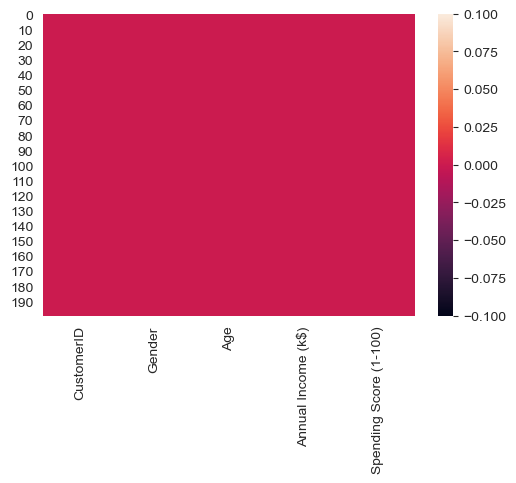

In [204]:
sns.heatmap(pd.isnull(df))

In [205]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Analyzing and Visualizing the data

In [206]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


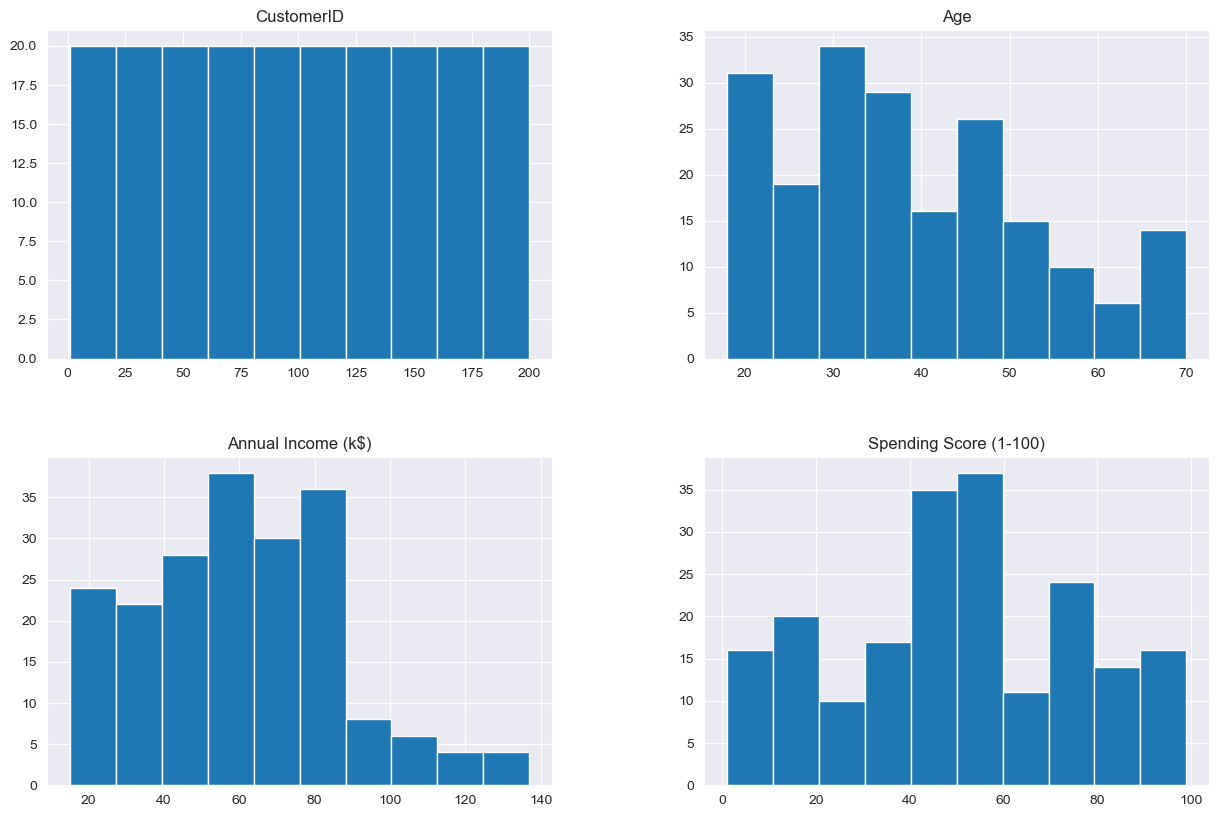

In [207]:
# Checking the data distribution
df.hist(bins=10, figsize=(15,10))
plt.show()

In [208]:
# Examining the relations between data
corr = df.corr()
corr

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

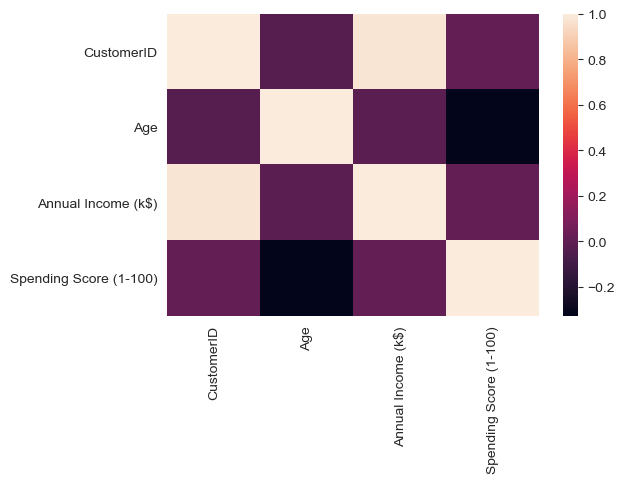

In [209]:
sns.heatmap(corr)

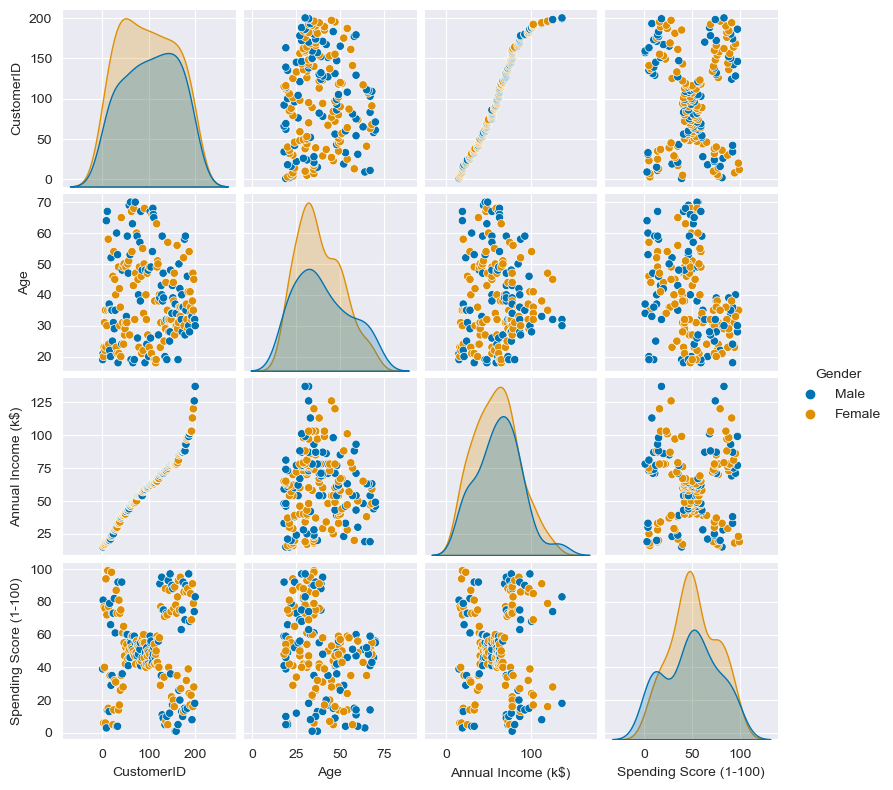

In [210]:
# Observing pairplot to visualise the distribution
sns.pairplot(df, hue="Gender", height = 2, palette = 'colorblind');

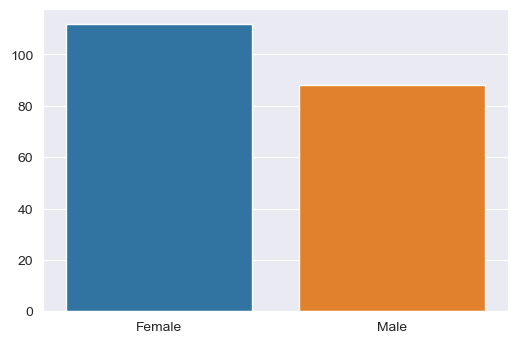

In [211]:
# Plotting barplot for gender distribution
genders = df['Gender'].value_counts()
sns.barplot(x=genders.index, y=genders.values)
plt.show()

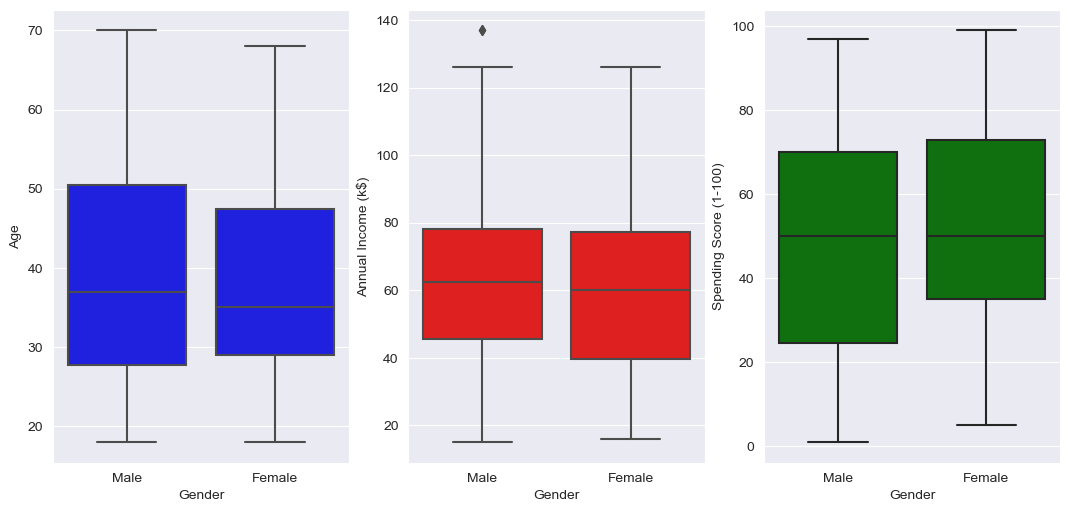

In [212]:
# plotting boxplot to analyze annual income and spending score
plt.figure(figsize=(13,6))
plt.subplot(1,3,1)
sns.boxplot(x=df['Gender'], y=df["Age"], color="blue")
plt.subplot(1,3,2)
sns.boxplot(x=df['Gender'], y=df["Annual Income (k$)"], color="red")
plt.subplot(1,3,3)
sns.boxplot(x=df['Gender'], y=df["Spending Score (1-100)"], color="green")
plt.show()

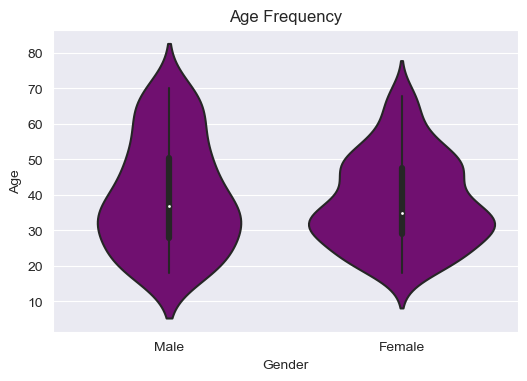

In [213]:
# Plotting age frequency using violinplot
plt.title("Age Frequency")
sns.violinplot(x=df['Gender'], y=df["Age"], color='purple')
plt.show()

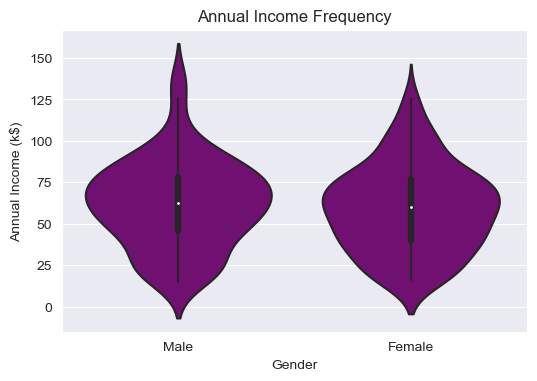

In [214]:
# Plotting annual income frequency using violinplot
plt.title("Annual Income Frequency")
sns.violinplot(x=df['Gender'], y=df["Annual Income (k$)"], color='purple')
plt.show()

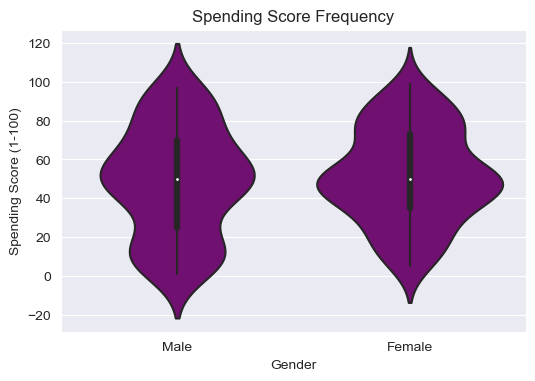

In [215]:
# Plotting spending score frequency using violinplot
plt.title("Spending Score Frequency")
sns.violinplot(x=df['Gender'], y=df["Spending Score (1-100)"], color='purple')
plt.show()

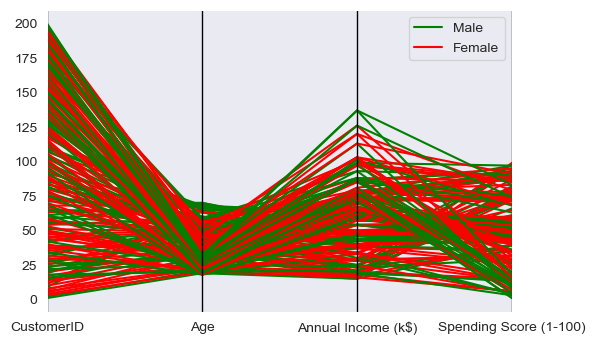

In [216]:
# Parallel Coordinates plot for data visualization
pd.plotting.parallel_coordinates(df, 'Gender', color = ['green', 'red']);

In [217]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


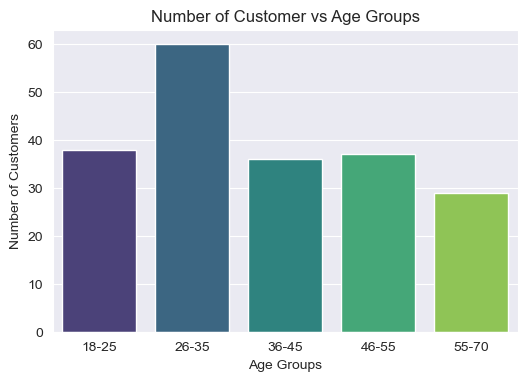

In [218]:
# Plotting  barplot to check the distribution of number of customers in each age group

age18_25 = df.Age[df.Age <= 25]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55_70 = df.Age[df.Age >= 56]

age_x = ["18-25","26-35","36-45","46-55","55-70"]
age_y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55_70.values)]

sns.barplot(x=age_x, y=age_y, palette="viridis")
plt.title("Number of Customer vs Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Number of Customers")
plt.show()


In [219]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


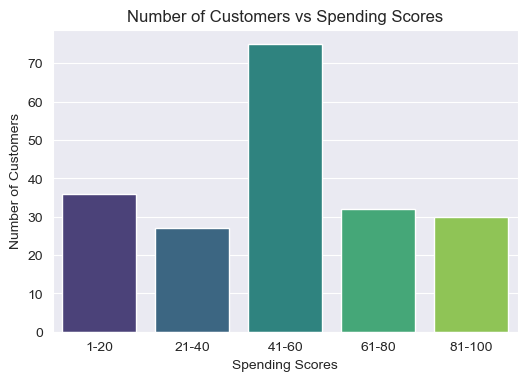

In [220]:
# Plotting  barplot to check the distribution of number of customers according to their spending scores

df.rename(columns = {'Spending Score (1-100)': 'S_score'}, inplace = True)

ss1_20 = df.S_score[df.S_score <= 20]
ss21_40 = df.S_score[(df.S_score >= 21) & (df.S_score <= 40)]
ss41_60 = df.S_score[(df.S_score >= 41) & (df.S_score <= 60)]
ss61_80 = df.S_score[(df.S_score >= 61) & (df.S_score <= 80)]
ss81_100 = df.S_score[df.S_score >= 81]

ss_x = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ss_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

sns.barplot(x=ss_x, y=ss_y, palette="viridis")
plt.title("Number of Customers vs Spending Scores")
plt.xlabel("Spending Scores")
plt.ylabel("Number of Customers")
plt.show()

In [221]:
df.describe()

,CustomerID,Age,Annual Income (k$),S_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


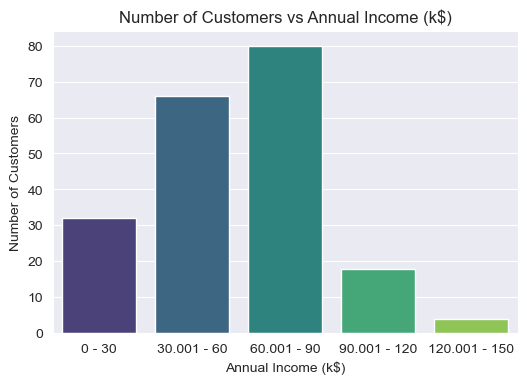

In [222]:
# Plotting  barplot to check the distribution of number of customers according to their annual income

df.rename(columns = {'Annual Income (k$)': 'A_income'}, inplace = True)

ai0_30 = df.A_income[df.A_income <= 30]
ai31_60 = df.A_income[(df.A_income >= 31) & (df.A_income <= 60)]
ai61_90 = df.A_income[(df.A_income >= 61) & (df.A_income <= 90)]
ai91_120 = df.A_income[(df.A_income >= 91) & (df.A_income <= 120)]
ai121_150 = df.A_income[df.A_income >= 121]

ai_x = ["0 - 30", "30.001 - 60", "60.001 - 90", "90.001 - 120", "120.001 - 150"]
ai_y = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

sns.barplot(x=ai_x, y=ai_y, palette="viridis")
plt.title("Number of Customers vs Annual Income (k$)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Number of Customers")
plt.show()

### Preparing the Data

In [223]:
gender_df = pd.get_dummies(df['Gender'])
gender_df.head(10)

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [224]:
df = pd.concat([df,gender_df['Female']],axis=1)
df.head()

,CustomerID,Gender,Age,A_income,S_score,Female
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [225]:
df.drop('Gender',axis=1,inplace=True)
df.head()

,CustomerID,Age,A_income,S_score,Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


# Finding the optimum number of clusters and k-means classification

### K-means classification on the basis of Age and Annual Income

In [226]:
df.head()

,CustomerID,Age,A_income,S_score,Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [227]:
df_new = df.iloc[:, [1,2]].values

In [228]:
from sklearn.cluster import KMeans

In [229]:
# Checking for optimum wcss (within cluster sum of squares) i.e. reduction in variance
wcss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)

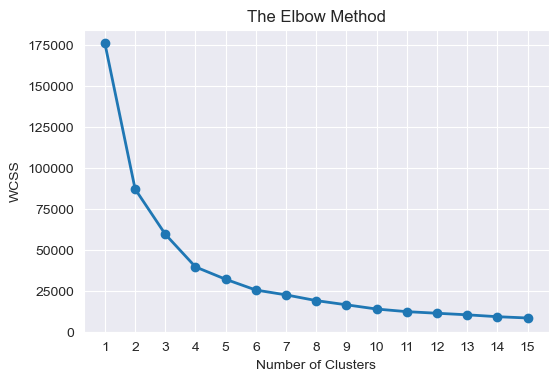

In [230]:
# Plotting a line graph of the results to observe 'The elbow'
mpl.rcParams['figure.dpi'] = 100

plt.plot(range(1, 16), wcss, marker ="o", linewidth=2)
plt.title('The Elbow Method')
plt.xticks(np.arange(1,16,1))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [231]:
# Creating the KMeans classifier
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_new)

In [232]:
y_kmeans

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 4, 0, 0, 0, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

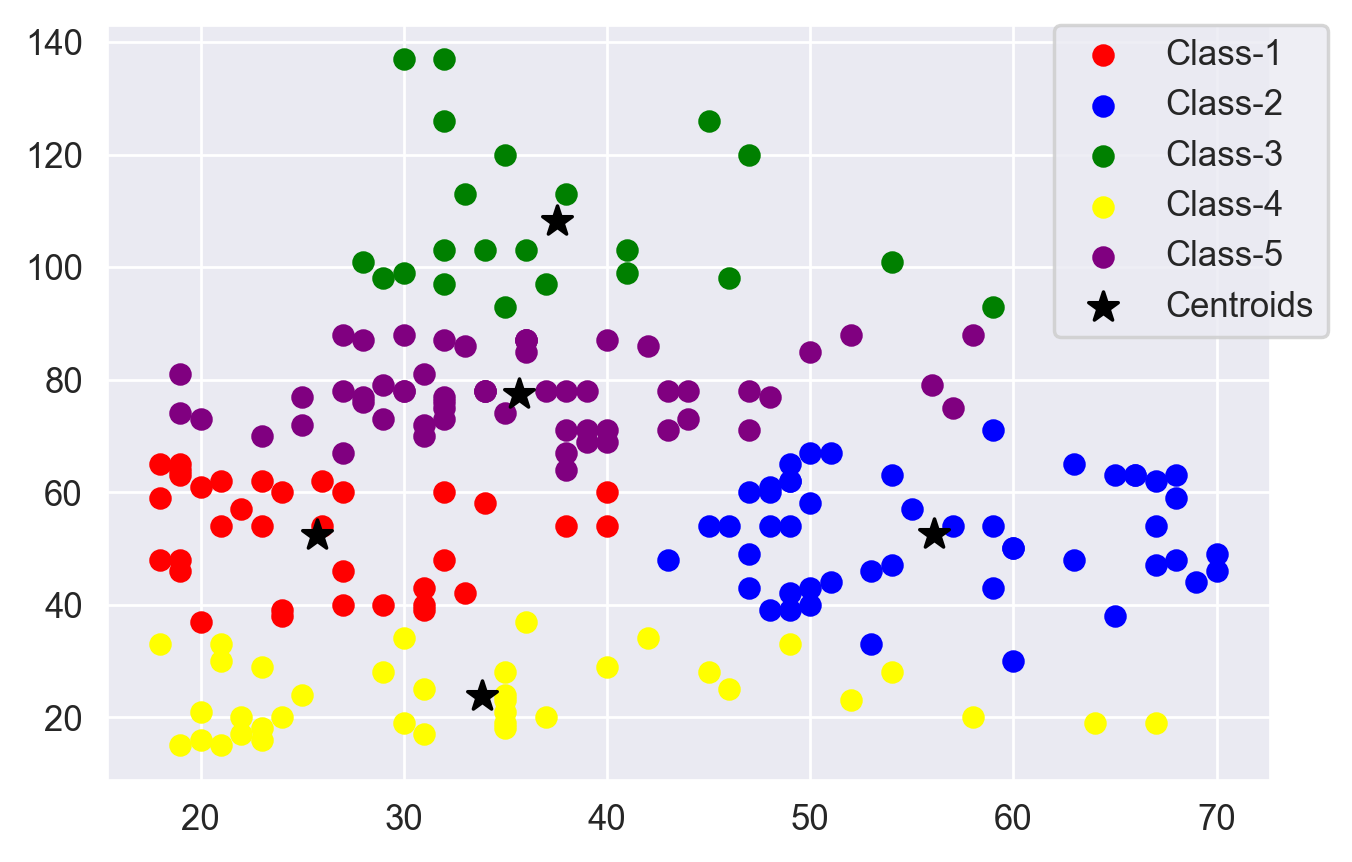

In [233]:
#Visualising the clusters
mpl.rcParams['figure.dpi'] = 250

plt.scatter(df_new[y_kmeans == 0, 0], df_new[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Class-1')
plt.scatter(df_new[y_kmeans == 1, 0], df_new[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Class-2')
plt.scatter(df_new[y_kmeans == 2, 0], df_new[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Class-3')
plt.scatter(df_new[y_kmeans == 3, 0], df_new[y_kmeans == 3, 1], s = 30, c = 'yellow', label = 'Class-4')
plt.scatter(df_new[y_kmeans == 4, 0], df_new[y_kmeans == 4, 1], s = 30, c = 'purple', label = 'Class-5')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 80, marker='*', c = 'black', label = 'Centroids')

plt.legend(bbox_to_anchor=(1.05, 1),borderaxespad=0)

### K-means classification on the basis of Age and Spending Score

In [234]:
df.head()

,CustomerID,Age,A_income,S_score,Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [235]:
df_new = df.iloc[:, [1,3]].values

In [236]:
# Checking for optimum wcss (within cluster sum of squares) i.e. reduction in variance
wcss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)

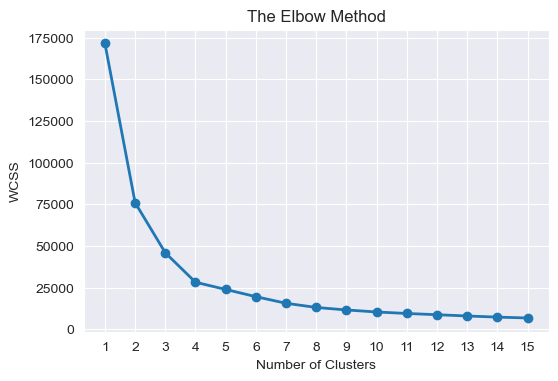

In [237]:
# Plotting a line graph of the results to observe 'The elbow'
mpl.rcParams['figure.dpi'] = 100

plt.plot(range(1, 16), wcss, marker ="o", linewidth=2)
plt.title('The Elbow Method')
plt.xticks(np.arange(1,16,1))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [238]:
# Creating the KMeans classifier
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_new)

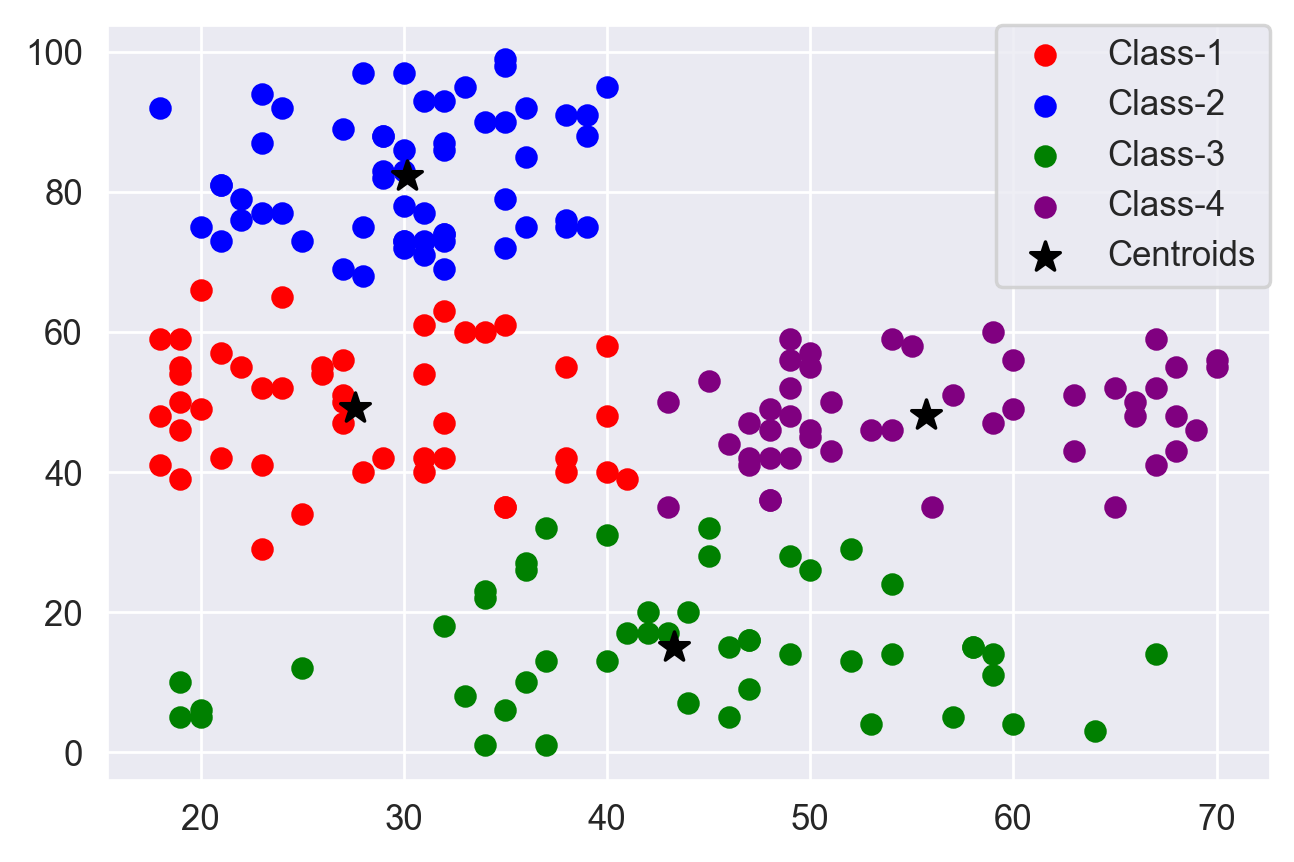

In [239]:
#Visualising the clusters
mpl.rcParams['figure.dpi'] = 250

plt.scatter(df_new[y_kmeans == 0, 0], df_new[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Class-1')
plt.scatter(df_new[y_kmeans == 1, 0], df_new[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Class-2')
plt.scatter(df_new[y_kmeans == 2, 0], df_new[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Class-3')
plt.scatter(df_new[y_kmeans == 3, 0], df_new[y_kmeans == 3, 1], s = 30, c = 'purple', label = 'Class-4')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 80, marker='*', c = 'black', label = 'Centroids')

plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0)

### K-means classification on the basis of Annual Income and Spending Score

In [240]:
df.head()

,CustomerID,Age,A_income,S_score,Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [241]:
df_new = df.iloc[:, [2,3]].values

In [242]:
# Checking for optimum wcss (within cluster sum of squares) i.e. reduction in variance
wcss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)

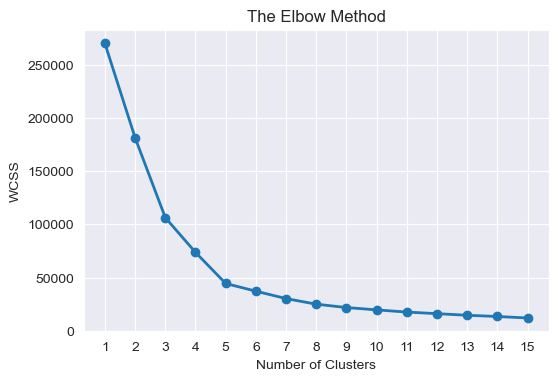

In [243]:
# Plotting a line graph of the results to observe 'The elbow'
mpl.rcParams['figure.dpi'] = 100

plt.plot(range(1, 16), wcss, marker ="o", linewidth=2)
plt.title('The Elbow Method')
plt.xticks(np.arange(1,16,1))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [244]:
# Creating the KMeans classifier
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_new)

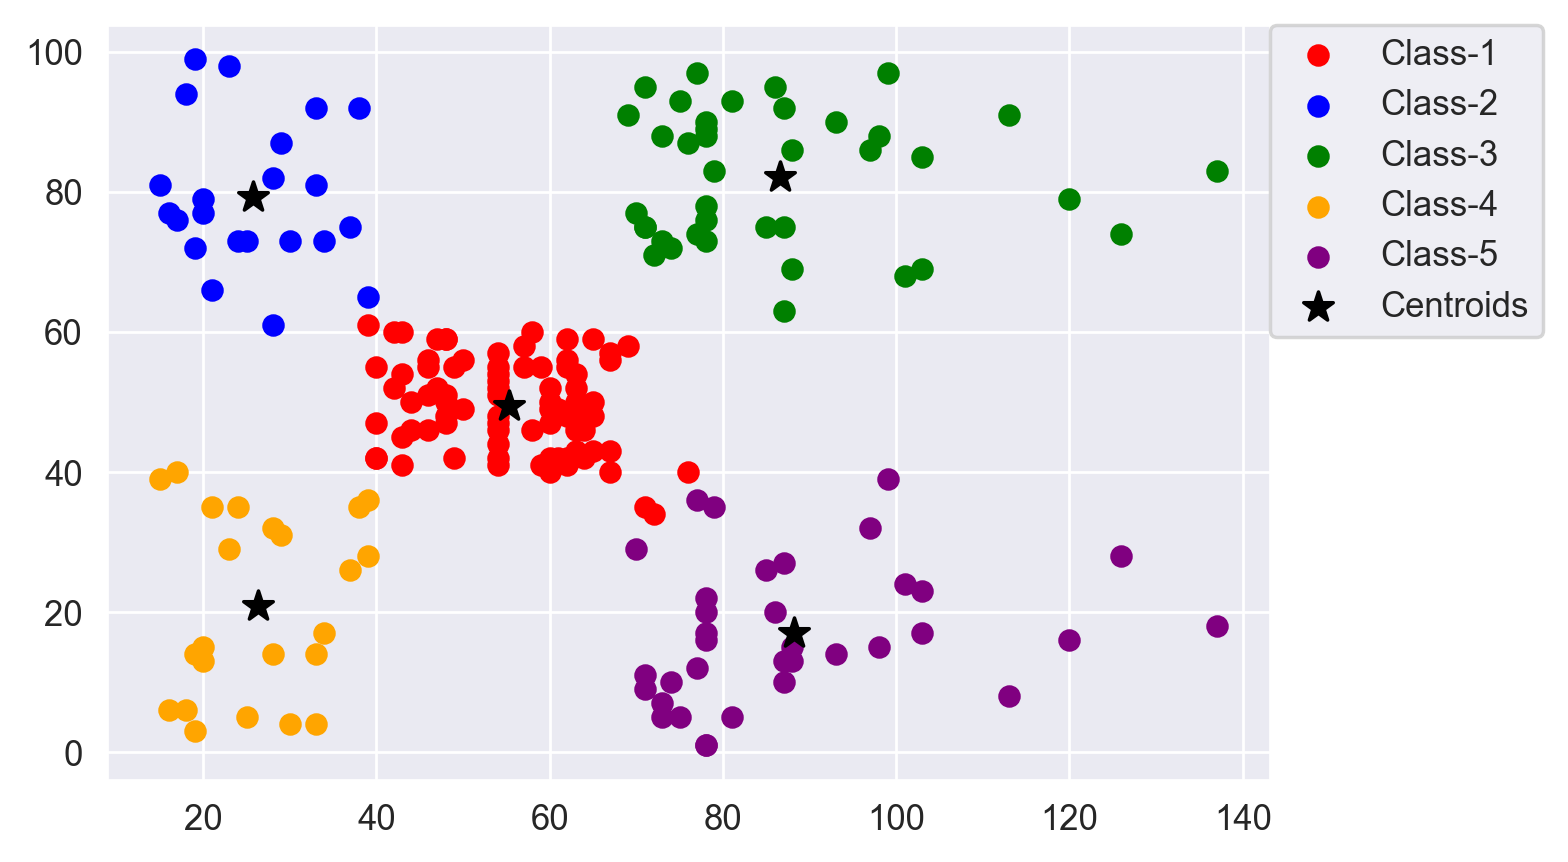

In [245]:
#Visualising the clusters
mpl.rcParams['figure.dpi'] = 250

plt.scatter(df_new[y_kmeans == 0, 0], df_new[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Class-1')
plt.scatter(df_new[y_kmeans == 1, 0], df_new[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Class-2')
plt.scatter(df_new[y_kmeans == 2, 0], df_new[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Class-3')
plt.scatter(df_new[y_kmeans == 3, 0], df_new[y_kmeans == 3, 1], s = 30, c = 'orange', label = 'Class-4')
plt.scatter(df_new[y_kmeans == 4, 0], df_new[y_kmeans == 4, 1], s = 30, c = 'purple', label = 'Class-5')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 80, marker='*', c = 'black', label = 'Centroids')

plt.legend(bbox_to_anchor=(1, 1),borderaxespad=0)

### K-means classification using all the available parameters

In [246]:
df.head()

,CustomerID,Age,A_income,S_score,Female
0,1,19,15,39,0
1,2,21,15,81,0
2,3,20,16,6,1
3,4,23,16,77,1
4,5,31,17,40,1


In [247]:
df_new = df.iloc[:, 1:].values

In [248]:
# Checking for optimum wcss (within cluster sum of squares) i.e. reduction in variance
wcss = []

for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_new)
    wcss.append(kmeans.inertia_)

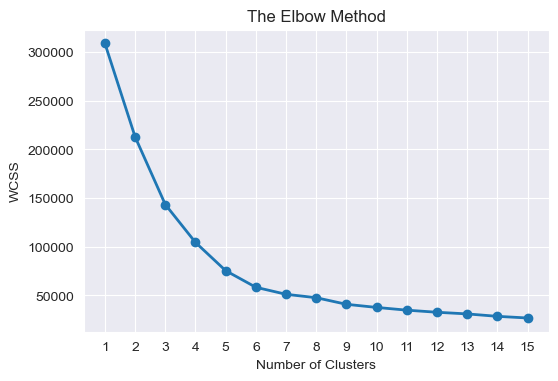

In [249]:
# Plotting a line graph of the results to observe 'The elbow'
mpl.rcParams['figure.dpi'] = 100

plt.plot(range(1, 16), wcss, marker ="o", linewidth=2)
plt.title('The Elbow Method')
plt.xticks(np.arange(1,16,1))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [250]:
# Creating the KMeans classifier
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df_new)

In [251]:
# Creating dataframe for the assigned classes to customers  
assigned_class = pd.DataFrame(y_kmeans)

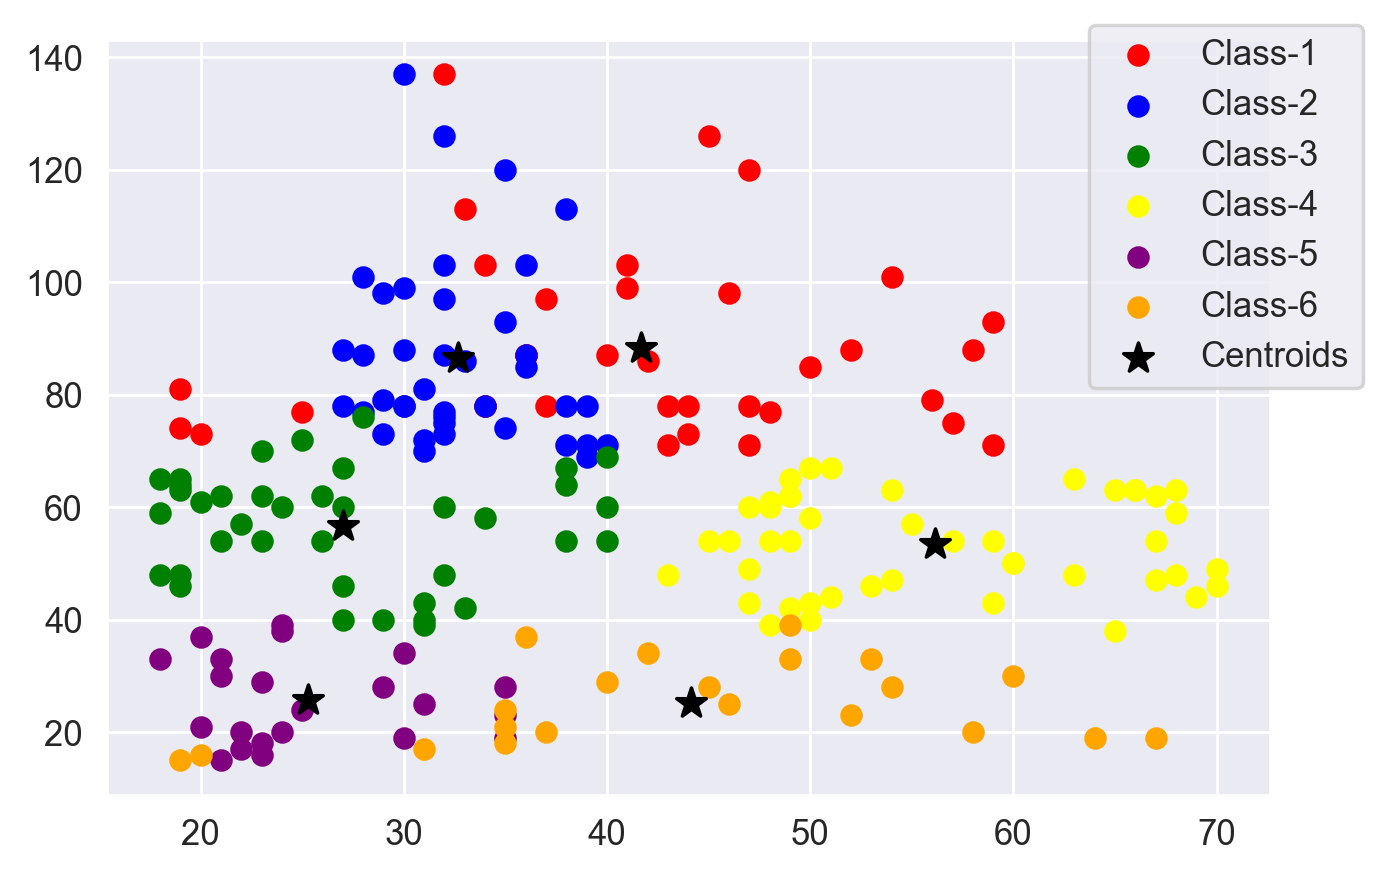

In [252]:
#Visualising the clusters
mpl.rcParams['figure.dpi'] = 250

plt.scatter(df_new[y_kmeans == 0, 0], df_new[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Class-1')
plt.scatter(df_new[y_kmeans == 1, 0], df_new[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Class-2')
plt.scatter(df_new[y_kmeans == 2, 0], df_new[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Class-3')
plt.scatter(df_new[y_kmeans == 3, 0], df_new[y_kmeans == 3, 1], s = 30, c = 'yellow', label = 'Class-4')
plt.scatter(df_new[y_kmeans == 4, 0], df_new[y_kmeans == 4, 1], s = 30, c = 'purple', label = 'Class-5')
plt.scatter(df_new[y_kmeans == 5, 0], df_new[y_kmeans == 5, 1], s = 30, c = 'orange', label = 'Class-6')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 80, marker='*', c = 'black', label = 'Centroids')

plt.legend(bbox_to_anchor=(1.08, 1.02),borderaxespad=0)

### Analyzing & Visualizing the classes assigned using all the available parameters

In [253]:
assigned_class.head()

,0
0,5
1,4
2,5
3,4
4,5


In [254]:
assigned_class.rename(columns = {0: 'Class'}, inplace = True)
assigned_class.head()

,Class
0,5
1,4
2,5
3,4
4,5


In [255]:
df = pd.concat([df,assigned_class],axis=1)
df.head()

,CustomerID,Age,A_income,S_score,Female,Class
0,1,19,15,39,0,5
1,2,21,15,81,0,4
2,3,20,16,6,1,5
3,4,23,16,77,1,4
4,5,31,17,40,1,5


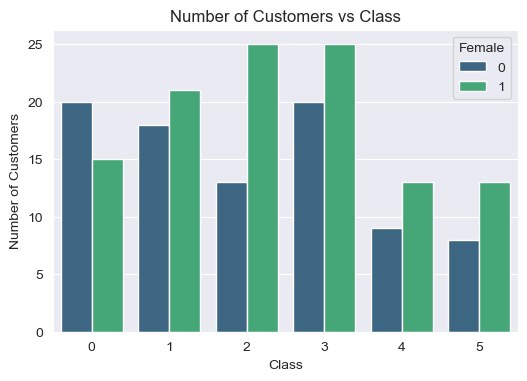

In [256]:
# Plotting barplot for customer distribution
mpl.rcParams['figure.dpi'] = 100

classes = df.groupby(["Class","Female"]).agg(customer_count=("CustomerID", 'count'))
classes = classes.reset_index()

ax=sns.barplot(x="Class", y="customer_count", hue="Female", data=classes, palette="viridis")
plt.title("Number of Customers vs Class")
plt.xlabel("Class")
plt.ylabel("Number of Customers")
plt.show()

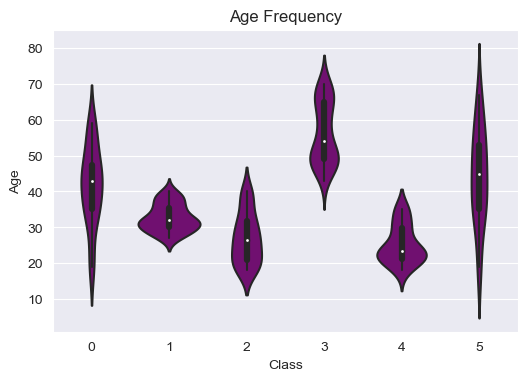

In [257]:
# Plotting age frequency against class
plt.title("Age Frequency")
sns.violinplot(x=df["Class"], y=df["Age"], color='purple')
plt.show()

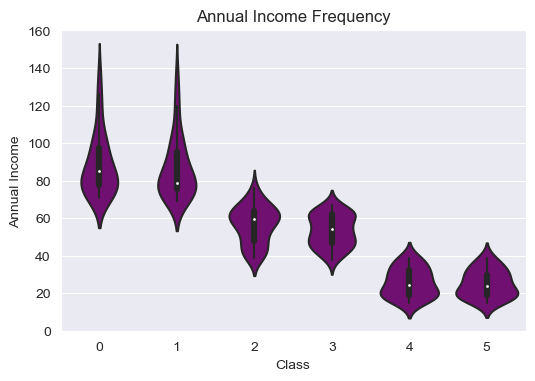

In [258]:
# Plotting annual income frequency against class
plt.title("Annual Income Frequency")
sns.violinplot(x=df["Class"], y=df["A_income"], color='purple')
plt.ylabel('Annual Income')
plt.show()

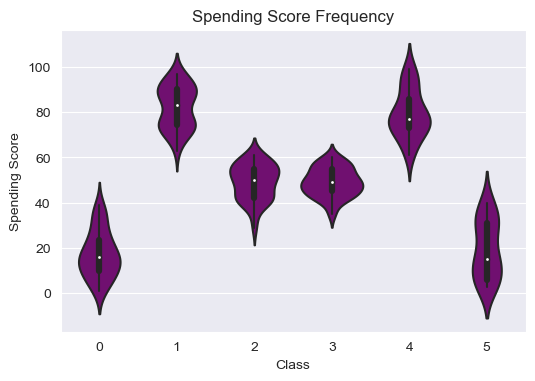

In [259]:
# Plotting spending score frequency against class
plt.title("Spending Score Frequency")
sns.violinplot(x=df["Class"], y=df["S_score"], color='purple')
plt.ylabel('Spending Score')
plt.show()

# Predicting class of new customers

In [260]:
df.head()

,CustomerID,Age,A_income,S_score,Female,Class
0,1,19,15,39,0,5
1,2,21,15,81,0,4
2,3,20,16,6,1,5
3,4,23,16,77,1,4
4,5,31,17,40,1,5


In [261]:
df.to_csv('Customer_Class.csv')

In [262]:
# Defining data and label
X = df.iloc[:, 1:5]
y = df.iloc[:, 5]

In [263]:
# Spliting data into training and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 

In [264]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(80, 4)
(120,)
(80,)


### Using KNN (K - Nearest Neighbour) algorithm

In [265]:
# Applying KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7, p = 2, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [266]:
# Accuracy of the KNN classifier on training data
knn.score(X_train, y_train)

0.9833333333333333

In [267]:
# Accuracy of the KNN classifier on test data
knn.score(X_test, y_test)

0.975

In [268]:
knn.predict(X_test)

array([2, 3, 5, 3, 0, 0, 2, 2, 4, 0, 1, 5, 4, 3, 3, 3, 1, 4, 0, 3, 2, 5,
       5, 2, 4, 0, 5, 5, 1, 4, 2, 1, 0, 1, 0, 2, 0, 3, 2, 0, 3, 3, 1, 5,
       3, 4, 2, 4, 1, 2, 3, 1, 3, 3, 4, 1, 1, 3, 1, 0, 3, 3, 2, 3, 4, 4,
       1, 2, 2, 3, 3, 2, 1, 0, 0, 2, 5, 3, 3, 2])

In [269]:
y_test.values

array([2, 3, 5, 3, 0, 0, 2, 5, 4, 0, 1, 5, 4, 3, 3, 3, 1, 4, 0, 3, 2, 5,
       5, 2, 4, 0, 5, 5, 1, 4, 2, 1, 0, 1, 0, 2, 0, 3, 2, 0, 3, 3, 1, 5,
       3, 4, 2, 4, 1, 2, 3, 1, 3, 3, 4, 1, 1, 3, 1, 0, 3, 3, 2, 3, 4, 4,
       1, 2, 2, 3, 3, 2, 1, 0, 0, 2, 5, 3, 2, 2])

### Using SVC (Support Vector Classification) algorithm

In [270]:
#Applying SVC (Support Vector Classification)
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(X_train, y_train)

SVC(gamma=0.1, random_state=0)

In [271]:
# Accuracy of the SVC classifier on training data
svm.score(X_train, y_train)

1.0

In [272]:
# Accuracy of the SVC classifier on test data
svm.score(X_test, y_test)

0.3875

In [273]:
svm.predict(X_test)

array([0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 0, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 2, 0, 0, 4,
       0, 2, 2, 0, 3, 2, 0, 0, 0, 2, 0, 3, 0, 0])

In [274]:
y_test.values

array([2, 3, 5, 3, 0, 0, 2, 5, 4, 0, 1, 5, 4, 3, 3, 3, 1, 4, 0, 3, 2, 5,
       5, 2, 4, 0, 5, 5, 1, 4, 2, 1, 0, 1, 0, 2, 0, 3, 2, 0, 3, 3, 1, 5,
       3, 4, 2, 4, 1, 2, 3, 1, 3, 3, 4, 1, 1, 3, 1, 0, 3, 3, 2, 3, 4, 4,
       1, 2, 2, 3, 3, 2, 1, 0, 0, 2, 5, 3, 2, 2])

### Using Decision Tree algorithm

In [275]:
# Applying Decision Tree
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [276]:
# Accuracy of the Decision Tree classifier on training data
decision_tree.score(X_train, y_train)

1.0

In [277]:
# Accuracy of the Decision Tree classifier on test data
decision_tree.score(X_test, y_test)

0.95

In [278]:
decision_tree.predict(X_test)

array([2, 5, 5, 3, 0, 0, 2, 2, 4, 0, 1, 5, 4, 3, 3, 3, 1, 4, 0, 3, 2, 5,
       5, 2, 4, 0, 5, 5, 1, 2, 2, 1, 0, 1, 0, 2, 0, 3, 2, 0, 3, 3, 1, 5,
       3, 4, 2, 4, 1, 2, 3, 1, 3, 3, 4, 1, 1, 3, 1, 0, 3, 3, 2, 5, 4, 4,
       1, 2, 2, 3, 3, 2, 1, 0, 0, 2, 5, 3, 2, 2])

In [279]:
y_test.values

array([2, 3, 5, 3, 0, 0, 2, 5, 4, 0, 1, 5, 4, 3, 3, 3, 1, 4, 0, 3, 2, 5,
       5, 2, 4, 0, 5, 5, 1, 4, 2, 1, 0, 1, 0, 2, 0, 3, 2, 0, 3, 3, 1, 5,
       3, 4, 2, 4, 1, 2, 3, 1, 3, 3, 4, 1, 1, 3, 1, 0, 3, 3, 2, 3, 4, 4,
       1, 2, 2, 3, 3, 2, 1, 0, 0, 2, 5, 3, 2, 2])

### Using Random Forest algorithm

In [280]:
# Using Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [281]:
# Accuracy of the Random Forest classifier on training data
random_forest.score(X_train, y_train)

1.0

In [282]:
# Accuracy of the Random Forest classifier on test data
random_forest.score(X_test, y_test)

0.9625

In [283]:
random_forest.predict(X_test)

array([2, 5, 5, 3, 0, 0, 2, 5, 4, 0, 1, 5, 4, 3, 3, 3, 1, 4, 0, 3, 2, 5,
       5, 2, 4, 0, 5, 5, 1, 2, 2, 1, 0, 1, 0, 2, 0, 3, 2, 0, 3, 3, 1, 5,
       3, 4, 2, 4, 1, 2, 3, 1, 3, 3, 4, 1, 1, 3, 1, 0, 3, 3, 2, 5, 4, 4,
       1, 2, 2, 3, 3, 2, 1, 0, 0, 2, 5, 3, 2, 2])

In [284]:
y_test.values

array([2, 3, 5, 3, 0, 0, 2, 5, 4, 0, 1, 5, 4, 3, 3, 3, 1, 4, 0, 3, 2, 5,
       5, 2, 4, 0, 5, 5, 1, 4, 2, 1, 0, 1, 0, 2, 0, 3, 2, 0, 3, 3, 1, 5,
       3, 4, 2, 4, 1, 2, 3, 1, 3, 3, 4, 1, 1, 3, 1, 0, 3, 3, 2, 3, 4, 4,
       1, 2, 2, 3, 3, 2, 1, 0, 0, 2, 5, 3, 2, 2])